### <font color=black>Querying and plotting datasets with python and Pandas package to read and pre-process</font>

In [1]:
import pandas as pd
import numpy as np

This dataset is stored as __fixed-column format__ file with no header

In [3]:
#the beginning of each column
colPositions=[0,46,48,50,52,54,56,58,60,66,74,78,80,84,87,90,95,99,103,106]

#calculating column widths
ColWidths=[colPositions[i+1]-colPositions[i] for i in range(0,len(colPositions)-1)]

#using read_fwf function to read fixed width format file, use header=None to avoid missing the 1st row
CarData= pd.read_fwf('carsData.dat',na_values = '*', header=None,widths=ColWidths, sep="\s+")

In [4]:
# verifying the data
CarData.shape

(428, 19)

In [5]:
CarData[:5]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,Chevrolet Aveo 4dr,0,0,0,0,0,0,0,11690,10965,1.6,4,103,28.0,34.0,2370.0,98.0,167.0,66.0
1,Chevrolet Aveo LS 4dr hatch,0,0,0,0,0,0,0,12585,11802,1.6,4,103,28.0,34.0,2348.0,98.0,153.0,66.0
2,Chevrolet Cavalier 2dr,0,0,0,0,0,0,0,14610,13697,2.2,4,140,26.0,37.0,2617.0,104.0,183.0,69.0
3,Chevrolet Cavalier 4dr,0,0,0,0,0,0,0,14810,13884,2.2,4,140,26.0,37.0,2676.0,104.0,183.0,68.0
4,Chevrolet Cavalier LS 2dr,0,0,0,0,0,0,0,16385,15357,2.2,4,140,26.0,37.0,2617.0,104.0,183.0,69.0


Adding column names to the dataset

In [6]:
cNames = ["Vehicle Name", "Sports Car?", "Sport Utility Vehicle?","Wagon?" ,"Minivan?" ,"Pickup?","All-Wheel Drive?" ,
          "Rear-Wheel Drive?","Suggested Retail Price", "Dealer Cost" ,"Engine Size" ,"Number of Cylinders","Horsepower",
          "City Miles Per Gallon", "Highway Miles Per Gallon", "Weight", "Wheel Base" ,"Length" , "Width"]
CarData.columns=cNames

In [7]:
CarData[:2]

,Vehicle Name,Sports Car?,Sport Utility Vehicle?,Wagon?,Minivan?,Pickup?,All-Wheel Drive?,Rear-Wheel Drive?,Suggested Retail Price,Dealer Cost,Engine Size,Number of Cylinders,Horsepower,City Miles Per Gallon,Highway Miles Per Gallon,Weight,Wheel Base,Length,Width
0,Chevrolet Aveo 4dr,0,0,0,0,0,0,0,11690,10965,1.6,4,103,28.0,34.0,2370.0,98.0,167.0,66.0
1,Chevrolet Aveo LS 4dr hatch,0,0,0,0,0,0,0,12585,11802,1.6,4,103,28.0,34.0,2348.0,98.0,153.0,66.0


------------------

### <font color=Black> Query and preprocess the dataset </font>

In [8]:
SCarsMask= (CarData['Sports Car?'] == 1) & (CarData['Horsepower'] >= 350)#complete
SportCars= CarData[SCarsMask] #complete

In [9]:
SportCars.shape

(9, 19)

In [10]:
SportCars[:5]

,Vehicle Name,Sports Car?,Sport Utility Vehicle?,Wagon?,Minivan?,Pickup?,All-Wheel Drive?,Rear-Wheel Drive?,Suggested Retail Price,Dealer Cost,Engine Size,Number of Cylinders,Horsepower,City Miles Per Gallon,Highway Miles Per Gallon,Weight,Wheel Base,Length,Width
246,Audi RS 6 4dr,1,0,0,0,0,0,0,84600,76417,4.2,8,450,15.0,22.0,4024.0,109.0,191.0,78.0
255,Chevrolet Corvette 2dr,1,0,0,0,0,0,1,44535,39068,5.7,8,350,18.0,25.0,3246.0,105.0,180.0,74.0
256,Chevrolet Corvette convertible 2dr,1,0,0,0,0,0,1,51535,45193,5.7,8,350,18.0,25.0,3248.0,105.0,180.0,74.0
258,Dodge Viper SRT-10 convertible 2dr,1,0,0,0,0,0,1,81795,74451,8.3,10,500,NaN,NaN,3410.0,99.0,176.0,75.0
266,Jaguar XKR coupe 2dr,1,0,0,0,0,0,1,81995,74676,4.2,8,390,16.0,23.0,3865.0,102.0,187.0,71.0


--------

In [11]:
 CityMPG_min = SportCars['City Miles Per Gallon'].min()
print(f"Min. City MPG of the selected sport cars = {CityMPG_min}")

Min. City MPG of the selected sport cars = 13.0


In [12]:
 HighwayMPG_min = SportCars['Highway Miles Per Gallon'].min()
print(f"Min. Highway MPG of the selected sport cars = {HighwayMPG_min}")

Min. Highway MPG of the selected sport cars = 19.0


In [13]:
# Replacing Nan values in 'City Miles Per Gallon' with the City min value above
SportCars['City Miles Per Gallon'].fillna(value = CityMPG_min, inplace=True)

# Replacing Nan values in 'Highway Miles Per Gallon' with the Highway MPG min value above
SportCars['Highway Miles Per Gallon'].fillna(value = HighwayMPG_min, inplace=True)


C:\Users\obinw\AppData\Local\Temp\ipykernel_10896\1733307041.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SportCars['City Miles Per Gallon'].fillna(value = CityMPG_min, inplace=True)
C:\Users\obinw\AppData\Local\Temp\ipykernel_10896\1733307041.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SportCars['Highway Miles Per Gallon'].fillna(value = HighwayMPG_min, inplace=True)


Checking if all nan values were correctly replaced By counting 

In [14]:
SportCars.isnull().sum()

Vehicle Name                0
Sports Car?                 0
Sport Utility Vehicle?      0
Wagon?                      0
Minivan?                    0
Pickup?                     0
All-Wheel Drive?            0
Rear-Wheel Drive?           0
Suggested Retail Price      0
Dealer Cost                 0
Engine Size                 0
Number of Cylinders         0
Horsepower                  0
City Miles Per Gallon       0
Highway Miles Per Gallon    0
Weight                      0
Wheel Base                  0
Length                      0
Width                       0
dtype: int64

--------

In [15]:
#Dropping 'Sports Car?' column
SportCars.drop('Sports Car?', axis=1, inplace=True) 

C:\Users\obinw\AppData\Local\Temp\ipykernel_10896\364747073.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SportCars.drop('Sports Car?', axis=1, inplace=True)


Verification

In [16]:
SportCars.columns

Index(['Vehicle Name', 'Sport Utility Vehicle?', 'Wagon?', 'Minivan?',
       'Pickup?', 'All-Wheel Drive?', 'Rear-Wheel Drive?',
       'Suggested Retail Price', 'Dealer Cost', 'Engine Size',
       'Number of Cylinders', 'Horsepower', 'City Miles Per Gallon',
       'Highway Miles Per Gallon', 'Weight', 'Wheel Base', 'Length', 'Width'],
      dtype='object')

In [17]:
SportCars.shape

(9, 18)

Removing all columns which have 0's in all values 

In [18]:
#Now remove all columns which have 0's in all values  
SportCars = SportCars.loc[:, (SportCars != 0).any(axis=0)]   

Verification 

In [19]:
SportCars.shape

(9, 13)

In [20]:
SportCars.columns

Index(['Vehicle Name', 'Rear-Wheel Drive?', 'Suggested Retail Price',
       'Dealer Cost', 'Engine Size', 'Number of Cylinders', 'Horsepower',
       'City Miles Per Gallon', 'Highway Miles Per Gallon', 'Weight',
       'Wheel Base', 'Length', 'Width'],
      dtype='object')

--------

In [21]:
#created new column from normalized [0-1] 'City Miles Per Gallon' column
scaling_CityMPG = (SportCars['City Miles Per Gallon'] - CityMPG_min) / (SportCars['City Miles Per Gallon'].max() - CityMPG_min)

SportCars['ScaledCityMPG'] = scaling_CityMPG


Verification 

In [22]:
SportCars

,Vehicle Name,Rear-Wheel Drive?,Suggested Retail Price,Dealer Cost,Engine Size,Number of Cylinders,Horsepower,City Miles Per Gallon,Highway Miles Per Gallon,Weight,Wheel Base,Length,Width,ScaledCityMPG
246,Audi RS 6 4dr,0,84600,76417,4.2,8,450,15.0,22.0,4024.0,109.0,191.0,78.0,0.4
255,Chevrolet Corvette 2dr,1,44535,39068,5.7,8,350,18.0,25.0,3246.0,105.0,180.0,74.0,1.0
256,Chevrolet Corvette convertible 2dr,1,51535,45193,5.7,8,350,18.0,25.0,3248.0,105.0,180.0,74.0,1.0
258,Dodge Viper SRT-10 convertible 2dr,1,81795,74451,8.3,10,500,13.0,19.0,3410.0,99.0,176.0,75.0,0.0
266,Jaguar XKR coupe 2dr,1,81995,74676,4.2,8,390,16.0,23.0,3865.0,102.0,187.0,71.0,0.6
267,Jaguar XKR convertible 2dr,1,86995,79226,4.2,8,390,16.0,23.0,4042.0,102.0,187.0,71.0,0.6
274,Mercedes-Benz SL55 AMG 2dr,1,121770,113388,5.5,8,493,14.0,21.0,4235.0,101.0,179.0,72.0,0.2
275,Mercedes-Benz SL600 convertible 2dr,1,126670,117854,5.5,12,493,13.0,19.0,4429.0,101.0,179.0,72.0,0.0
287,Porsche 911 GT2 2dr,1,192465,173560,3.6,6,477,17.0,24.0,3131.0,93.0,175.0,72.0,0.8


### <font color=Black> Extracting statistical data </font>

By showing the descriptive statistics, plotting the correlation matrix and the scatter matrix of the dataset.

In [23]:
import matplotlib.pyplot as plt

In [24]:
#descriptive statstics table of the selected columns
SportCars[['Suggested Retail Price', 'Engine Size', 'Number of Cylinders', 'Horsepower', 'City Miles Per Gallon', 'Highway Miles Per Gallon', 'Weight']].describe()

,Suggested Retail Price,Engine Size,Number of Cylinders,Horsepower,City Miles Per Gallon,Highway Miles Per Gallon,Weight
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,96928.888889,5.211111,8.444444,432.555556,15.555556,22.333333,3736.666667
std,44912.730710,1.407519,1.666667,62.638070,1.943651,2.291288,483.866201
min,44535.000000,3.600000,6.000000,350.000000,13.000000,19.000000,3131.000000
25%,81795.000000,4.200000,8.000000,390.000000,14.000000,21.000000,3248.000000
50%,84600.000000,5.500000,8.000000,450.000000,16.000000,23.000000,3865.000000
75%,121770.000000,5.700000,8.000000,493.000000,17.000000,24.000000,4042.000000
max,192465.000000,8.300000,12.000000,500.000000,18.000000,25.000000,4429.000000


--------

In [26]:
# correlation matrix of the selected columns
SportCars[['Suggested Retail Price', 'Engine Size', 'Number of Cylinders', 'Horsepower', 'City Miles Per Gallon', 'Highway Miles Per Gallon', 'Weight']].corr()
 

,Suggested Retail Price,Engine Size,Number of Cylinders,Horsepower,City Miles Per Gallon,Highway Miles Per Gallon,Weight
Suggested Retail Price,1.000000,-0.385774,-0.170957,0.686069,-0.259487,-0.237860,0.111869
Engine Size,-0.385774,1.000000,0.562455,0.225920,-0.427471,-0.493535,-0.164647
Number of Cylinders,-0.170957,0.562455,1.000000,0.344572,-0.703144,-0.763763,0.515742
Horsepower,0.686069,0.225920,0.344572,1.000000,-0.829364,-0.814917,0.372939
City Miles Per Gallon,-0.259487,-0.427471,-0.703144,-0.829364,1.000000,0.991738,-0.657298
Highway Miles Per Gallon,-0.237860,-0.493535,-0.763763,-0.814917,0.991738,1.000000,-0.598799
Weight,0.111869,-0.164647,0.515742,0.372939,-0.657298,-0.598799,1.000000


Correlation Matrix plot

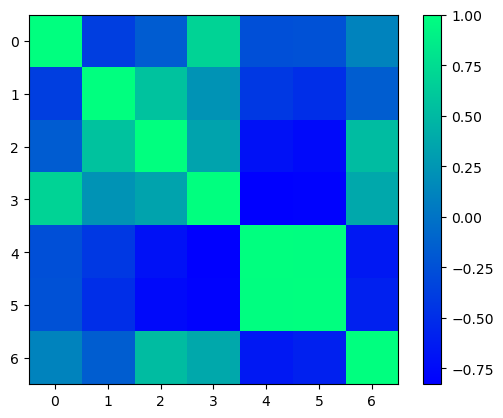

In [27]:
plt.imshow(SportCars[['Suggested Retail Price', 'Engine Size', 'Number of Cylinders', 'Horsepower', 'City Miles Per Gallon', 'Highway Miles Per Gallon', 'Weight']].corr(), cmap='winter')
plt.colorbar()
plt.show() 


--------

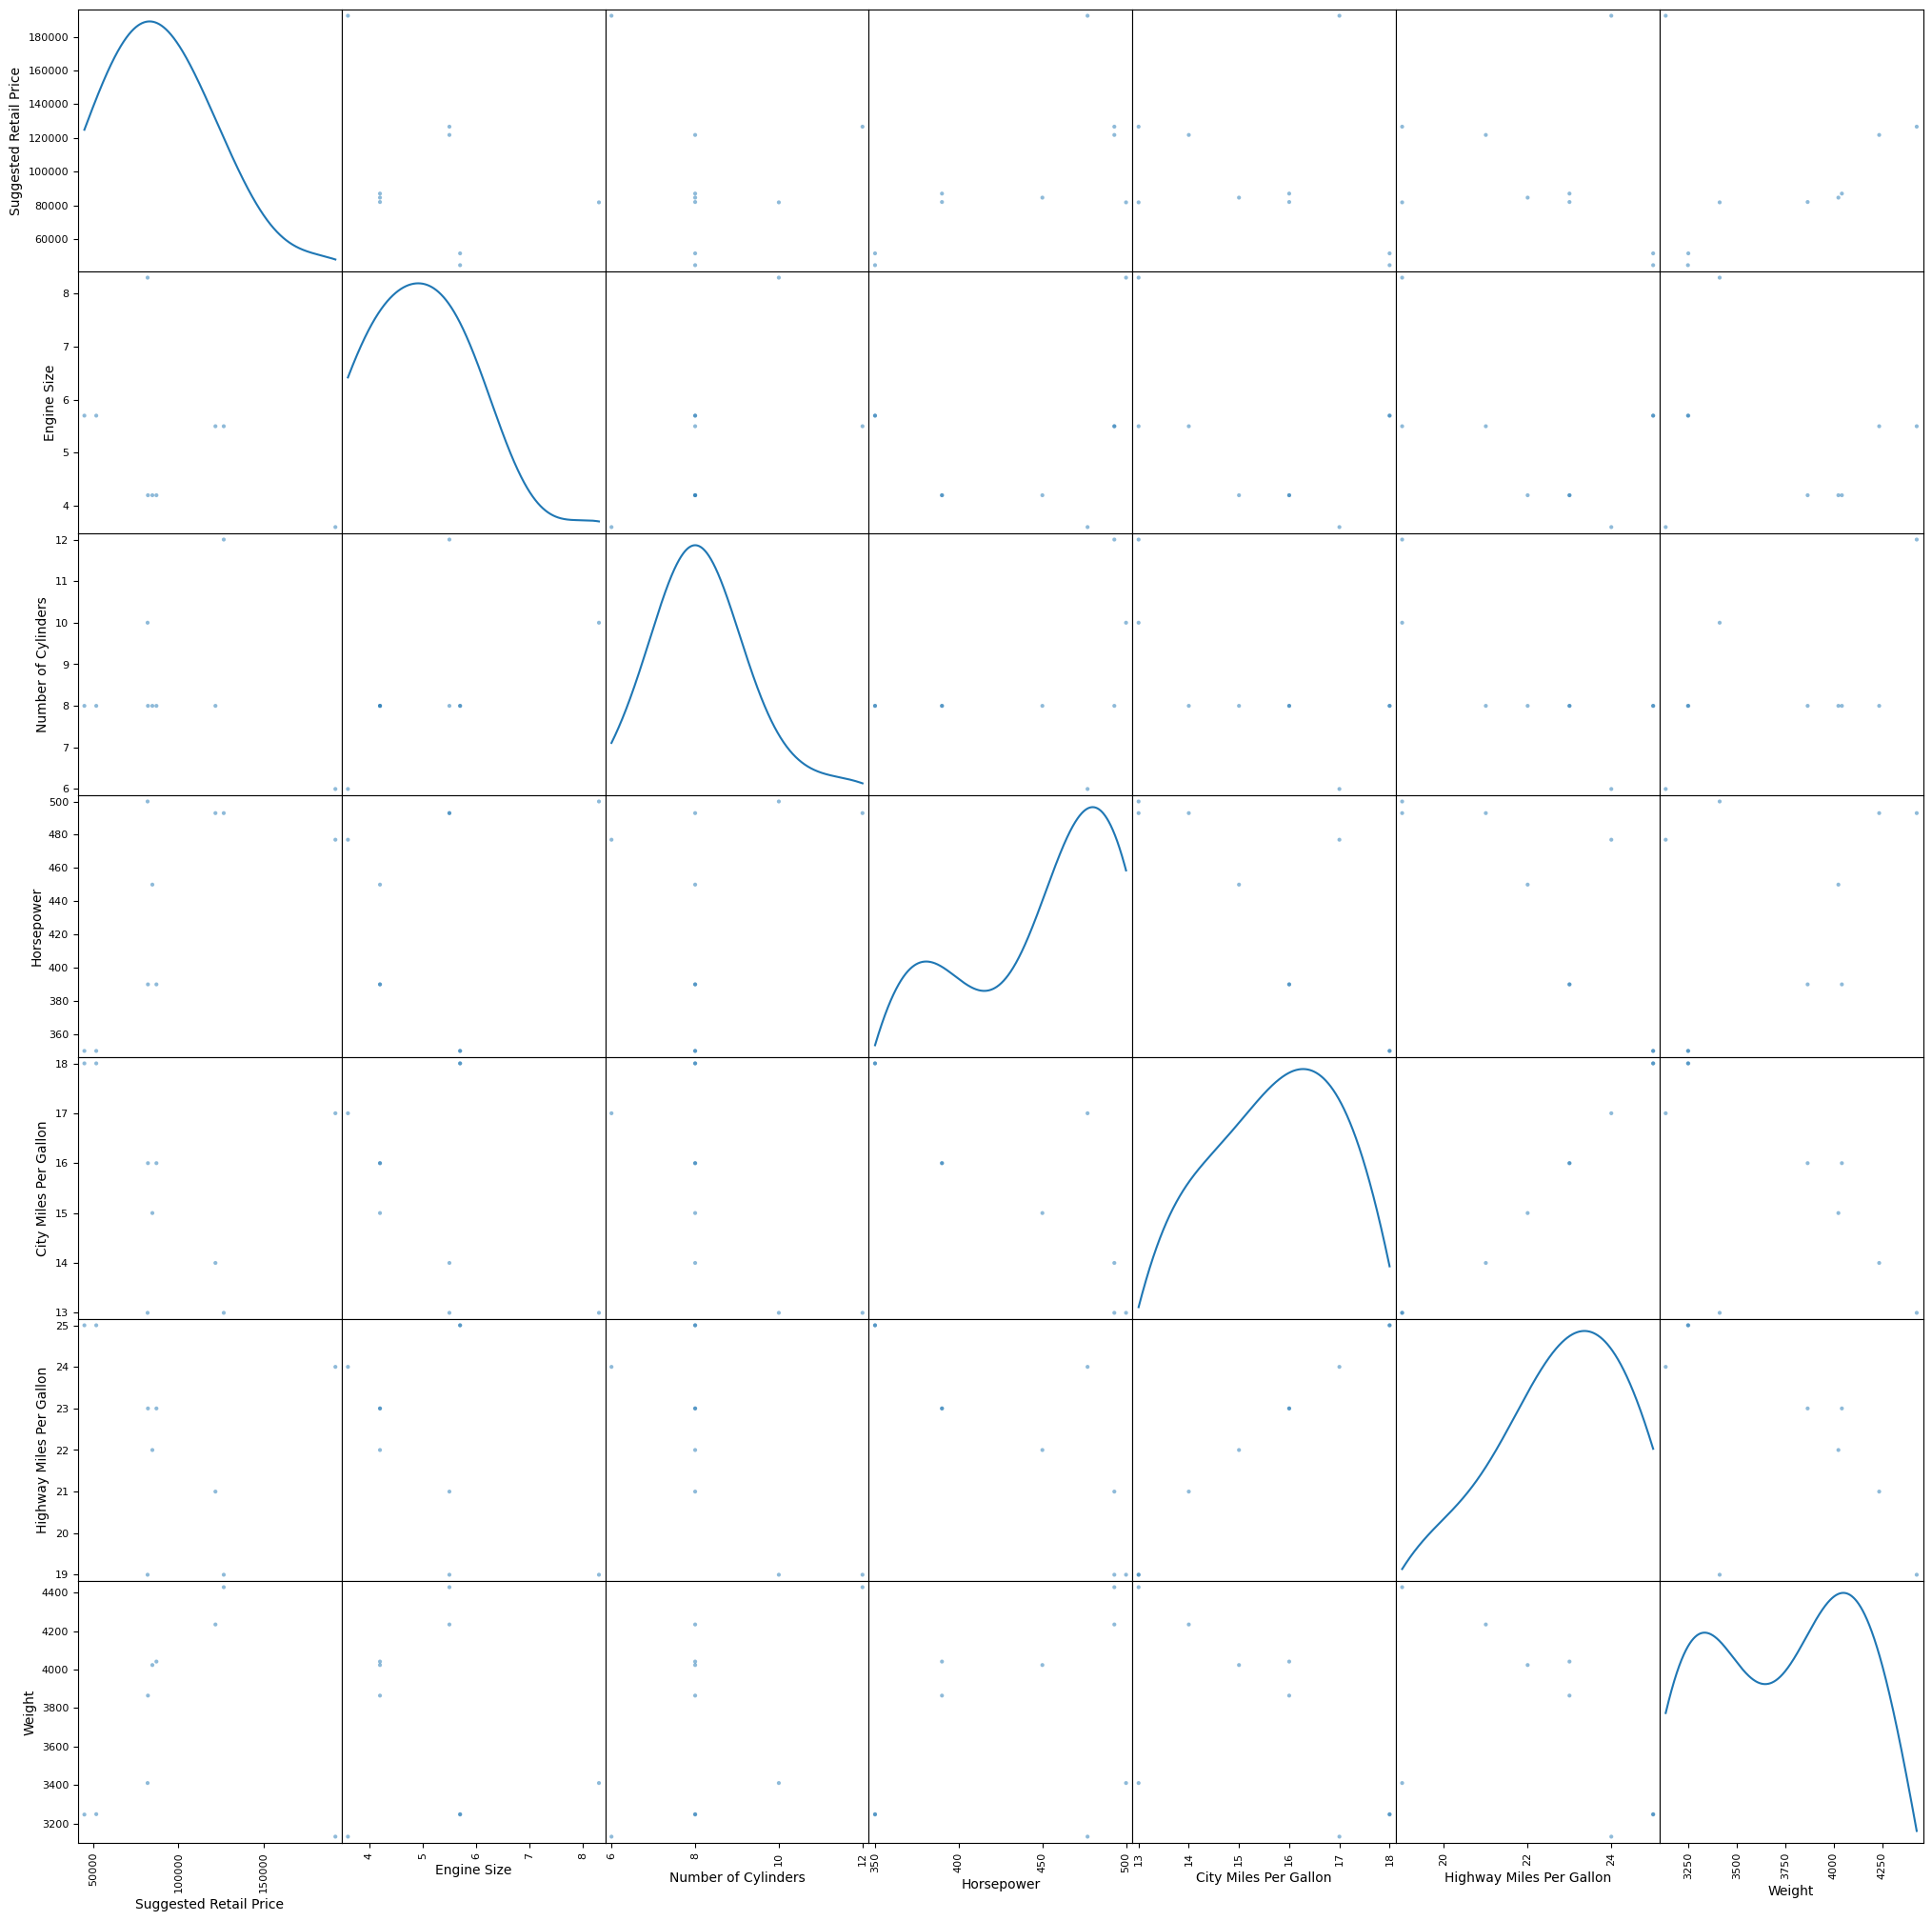

In [28]:
#Scatter matrix of selected columns
pd.plotting.scatter_matrix(SportCars[['Suggested Retail Price', 'Engine Size', 'Number of Cylinders', 'Horsepower', 'City Miles Per Gallon', 'Highway Miles Per Gallon', 'Weight']], figsize=(25,25), diagonal='kde')
plt.show() 

--------

#### Observations from the statistical analysis:

* Relationships observed between MPG (city or highway) and each of the following:

     * `Number of Cylinders`:As City Miles Per Gallon and Highway Miles Per Gallon of cars increases, Number of Cylinders of cars decreases.
     
     * `Suggested Retail Price`: As City Miles Per Gallon and Highway Miles Per Gallon of cars increases, Suggested Retail Price of cars decreases.
     
     * `horsepower`: As City Miles Per Gallon and Highway Miles Per Gallon of cars increases, Horsepower of cars decreases.
     
     * `weight`: As City Miles Per Gallon and Highway Miles Per Gallon of cars increases, Weight of cars decreases.
     
     * `Engine Size` : As City Miles Per Gallon and Highway Miles Per Gallon of cars increases, Engine Size of cars decreases.
       
    
       
* Pairwise Correlation (negative, positive, or no correlation) between :
    * `Engine Size` Vs.:
        * `Number of Cylinders`: Positive
        * `horsepower`: Positive
        * `weight:Negative
        
    *  `Number of Cylinders` Vs.:
        * `horsepower` : Positive
        * `weight`  : Positive
        
    *  `horsepower` Vs.:
        * `weight` : Positive
   


### <font color=Black> Plotting a bar chart using a subset of the data</font>

In [30]:
# creating an array named mpgColors of 40 colors using the Greens colormap
# and map the colors to the values of scaledCityMPG column 
cmap = plt.get_cmap('Greens', 40)

mpgColors = cmap(scaling_CityMPG)

In [31]:
mpgColors[:5]

array([[0.58159879, 0.82775264, 0.56691805, 1.        ],
       [0.        , 0.26666667, 0.10588235, 1.        ],
       [0.        , 0.26666667, 0.10588235, 1.        ],
       [0.96862745, 0.98823529, 0.96078431, 1.        ],
       [0.27028658, 0.67812971, 0.37224736, 1.        ]])

--------

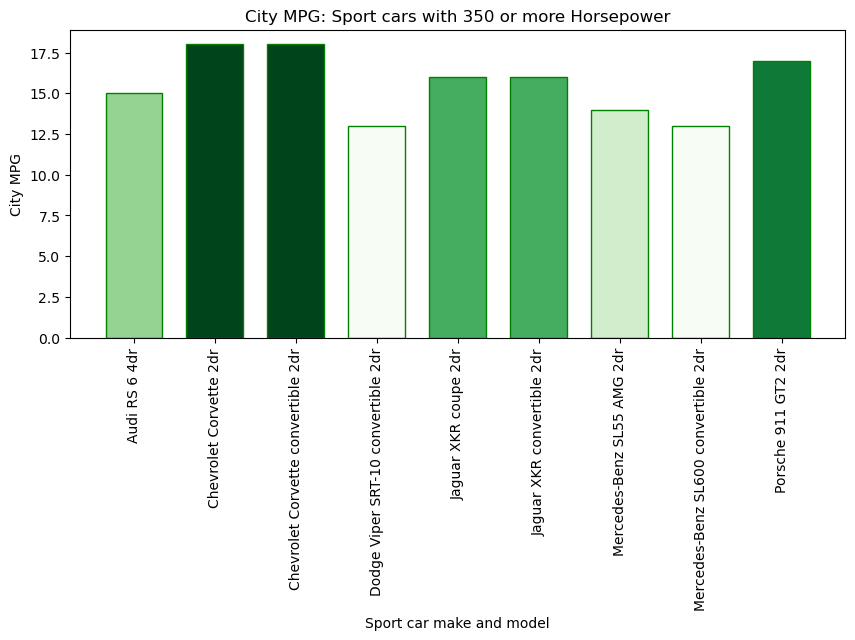

In [32]:
#plotting a bar plot using the column 'City Miles Per Gallon' to create visual comparison between the selected set of cars in SportCars
car_index = np.arange(1,10,1)
selected_cars = ['Audi RS 6 4dr', 'Chevrolet Corvette 2dr', 'Chevrolet Corvette convertible 2dr', 'Dodge Viper SRT-10 convertible 2dr', 'Jaguar XKR coupe 2dr', 'Jaguar XKR convertible 2dr', 'Mercedes-Benz SL55 AMG 2dr', 'Mercedes-Benz SL600 convertible 2dr', 'Porsche 911 GT2 2dr']

plt.figure(figsize=(10,4))

bar_width = 0.7
plt.bar(car_index, SportCars['City Miles Per Gallon'], width=bar_width, color = mpgColors, edgecolor='Green')

plt.xticks(car_index, selected_cars, rotation=90)

plt.xlabel('Sport car make and model')
plt.ylabel('City MPG')
plt.title('City MPG: Sport cars with 350 or more Horsepower')

plt.savefig('CityMPG-Hp350plus-SportCars.png')

plt.show()

--------

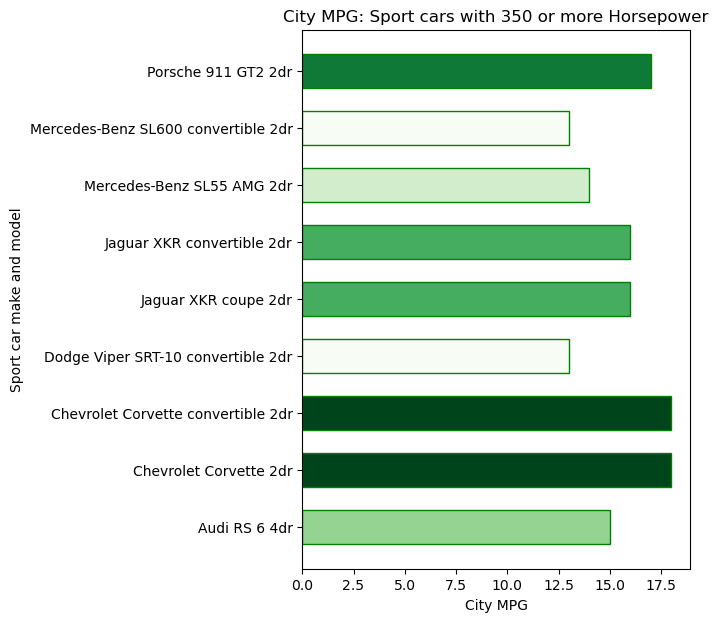

In [35]:
#creating a horizontal bar plot to create visual comparison between selected sets of cars and City Miles Per Gallon
plt.figure(figsize=(5,7))

plt.barh(y=car_index, width=SportCars['City Miles Per Gallon'], height=0.6, color=mpgColors, label='City Miles Per Gallon', edgecolor='Green')

tick_location = car_index

plt.yticks(tick_location, selected_cars)

plt.xlabel('City MPG')
plt.ylabel('Sport car make and model')
plt.title('City MPG: Sport cars with 350 or more Horsepower')

plt.show()

--------